# MP Likelihood profile code tests

This code uses MontePython to run a likelihood profile iteration with much the same logic as the Cobaya version. The primary difference in logic is the minimiser algorithm employed - here, we use the approach defined in [2107.10291](https://inspirehep.net/literature/1890425) based on iteratively running an MCMC per point, tweaking the crieteria for acceptance of a point and the proposed step size. 

**This code is being actively developed and is not ready for use yet**.

In [1]:
from MP_classes_lkl_prof_functions import *

In [2]:
# test = lkl_prof('/home2/karwal/lkl_prof/lcdm_mp_mcmc/', 'lcdm_mp_mcmc', 'H0')
# test.prof_incr = -0.1
# test.prof_max = 72.
# test.prof_min = 65.
# test.processes = 2

test = lkl_prof('/home2/karwal/mcmc_chains/s12_chains/', 's12_chains', 'fraction_axion_ac')
test.prof_incr = 0.01
test.prof_max = 0.17
test.prof_min = 0.05
test.processes = 2

In [3]:
test.check_mcmc_chains(read_all_chains=True)

check_mcmc_chains: Looking for files: /home2/karwal/mcmc_chains/s12_chains/2022-08-23_1000000_
check_mcmc_chains: Reading all chains:
2022-08-23_1000000__4.txt
2022-08-23_1000000__6.txt
2022-08-23_1000000__1.txt
2022-08-23_1000000__2.txt
2022-08-23_1000000__3.txt
2022-08-23_1000000__5.txt
2022-08-23_1000000__4.txt
2022-08-23_1000000__6.txt
2022-08-23_1000000__1.txt
2022-08-23_1000000__2.txt
2022-08-23_1000000__3.txt
2022-08-23_1000000__5.txt
Removed 0.3 as burn in


True

In [4]:
test.check_mcmc_convergence()

check_mcmc_convergence: Chains not converged. Current R-1 = 4.804 while R-1 wanted = 0.050. 
Resume MCMC. 


False

In [5]:
# test.mcmc()

In [5]:
test.global_min(run_glob_min=False, N_min_steps=10);

check_global_min: Found minimum with file name s12_chains
match_param_names: Params match - the recorded params contain the same params as param_names passed. 


In [7]:
test.global_ML;

In [9]:
test.param_order;

In [10]:
test.init_lkl_prof()

mkdir: cannot create directory ‘lkl_prof_+fraction_axion_ac/’: File exists


0.17279550000000005

In [10]:
# test.run_lkl_prof(time_mins=True,N_min_steps=10)

### Check output

In [11]:
lkl_prof_output = test.full_lkl_prof_dict()

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
x = lkl_prof_output['f_ede'][6:]
y = lkl_prof_output['-logLike'][6:]

In [14]:
quad = np.polyfit(x, y, deg=2)

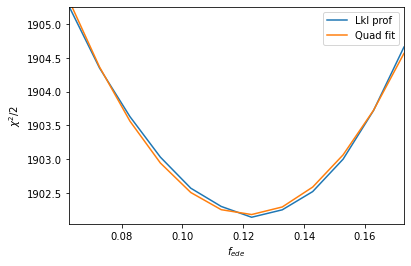

In [15]:
plt.plot(x, y, label="Lkl prof")
plt.plot(x, quad[0]*x*x + quad[1]*x + quad[2], label="Quad fit")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y)-0.1, max(y)])
plt.legend()
plt.show()

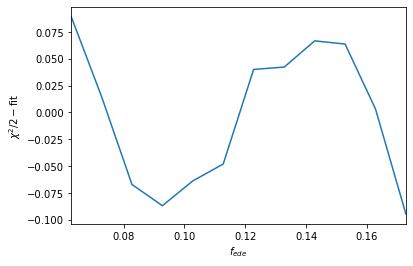

In [16]:
plt.plot(x, quad[0]*x*x + quad[1]*x + quad[2] -y, label="Quad fit difference")
plt.ylabel(r'$\chi^2/2 - $fit')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
# plt.ylim([min(y)-0.1, max(y)])
plt.show()

### Run minimizer with specific ladder algorithm

Pass two lists specifying how you want the MCMC minimizer to run - provide equal arrays for jump_fac and lkl_fac as shown. 

If no lists are passed, the code defaults to some 4-rung ladder defined in the run_minimizer function. 

In [ ]:
test.jump_fac = [0.5, 0.2]
test.lkl_fac = [1, 20]

In [38]:
run_min_new(N_steps=50)

 /!\ Appending to an existing folder: using the log.param instead of
     /home2/karwal/mcmc_chains/s12_chains/lkl_prof_+fraction_axion_ac/log.param
Running Monte Python v3.5.0

 /!\ Your code location in the log.param file is in contradiction with your
     .conf file. I will use the one from log.param.
with CLASS v2.9.4

Testing likelihoods for:
 ->Planck_highl_TTTEEE, Planck_lowl_EE, Planck_lowl_TT, Planck_lensing, Pantheon, bao_boss_dr12, bao_smallz_2014, sh0es

----
clik version plc_3.1
  smica
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22b_TTTEEE.clik' on test data. got -1172.47 expected -1172.47 (diff -4.34055e-07)
----
Initializing SimAll
----
clik version plc_3.1
  simall simall_EE_BB_TE
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/simall/simall_100x143_offlike5_EE_Aplanck_B.clik' on test data. got -197.99 expected -197.99 (d

----
clik version plc_3.1
  smica
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22b_TTTEEE.clik' on test data. got -1172.47 expected -1172.47 (diff -4.34055e-07)
----
Initializing SimAll
----
clik version plc_3.1
  simall simall_EE_BB_TE
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/simall/simall_100x143_offlike5_EE_Aplanck_B.clik' on test data. got -197.99 expected -197.99 (diff -4.1778e-08)
----
----
clik version plc_3.1
  gibbs_gauss b13c8fda-1837-41b5-ae2d-78d6b723fcf1
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/commander/commander_dx12_v3_2_29.clik' on test data. got -11.6257 expected -11.6257 (diff -1.07424e-09)
----
Checking lensing likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/lensing/smicadx12_Dec5_ftl_mv2_ndclpp

2  1903.06	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	4.279584e+01	9.624226e-01	7.138316e+00	2.454268e+02	4.876973e+01	5.725830e+01	1.240869e+02	1.652296e-01	8.717681e+00	1.112606e+01	2.000243e+01	9.539436e+01	1.203698e-01	1.402218e-01	4.775690e-01	2.319737e-01	6.628219e-01	2.089535e+00	9.998549e+02	9.981002e+02	9.993072e-01	-1.928780e+01	3.066464e+00	1.308269e+01	1.378251e+02	4.300321e+01	1.213341e+01	1.041384e+00	8.425469e-01	7.975402e-01	3.003698e-01	6.995805e-01	1.241192e-01	3.537097e+00	-7.582280e-01	5.471397e+00	
2  1903.11	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	4.261212e+01	9.757951e-01	7.163094e+00	2.434511e+02	4.865202e+01	5.725682e+01	1.239216e+02	1.729407e-01	8.660334e+00	1.092871e+01	2.004561e+01	9.573314e+01	1.210676e-01	1.433283e-01	4.749047e-01	2.413973e-01	6.523451e-01	2.087601e+00	9.998346e+02	9.981018e+02	9.992504e-0

1  1904.57	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	4.052693e+01	8.356742e-01	7.276394e+00	2.424098e+02	4.734246e+01	5.435383e+01	1.251870e+02	9.339375e-01	9.804386e+00	1.154216e+01	2.086555e+01	9.891606e+01	1.327242e-01	1.371001e-01	4.963542e-01	2.008207e-01	6.240275e-01	2.114227e+00	9.994721e+02	9.978931e+02	9.998437e-01	-1.928744e+01	3.066464e+00	1.308269e+01	1.378251e+02	4.300321e+01	1.213341e+01	1.041384e+00	8.425469e-01	7.975402e-01	3.003698e-01	6.995805e-01	1.241192e-01	3.537097e+00	-7.582280e-01	5.471397e+00	
1  1904.66	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	3.992584e+01	8.173761e-01	7.372059e+00	2.381876e+02	4.565792e+01	5.345548e+01	1.258930e+02	1.219145e+00	9.991018e+00	1.146316e+01	2.093966e+01	9.919253e+01	1.340313e-01	1.394065e-01	4.787713e-01	2.036869e-01	6.275997e-01	2.146293e+00	9.995918e+02	9.979612e+02	9.998267e-0

1  1905.41	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	4.200069e+01	9.711383e-01	7.467819e+00	2.286575e+02	4.649129e+01	5.551303e+01	1.230818e+02	9.664002e-01	1.001312e+01	1.220155e+01	2.225238e+01	9.844800e+01	1.414220e-01	1.277446e-01	4.120349e-01	1.863293e-01	6.449785e-01	2.276948e+00	9.995850e+02	9.981822e+02	9.998248e-01	-1.928751e+01	3.066464e+00	1.308269e+01	1.378251e+02	4.300321e+01	1.213341e+01	1.041384e+00	8.425469e-01	7.975402e-01	3.003698e-01	6.995805e-01	1.241192e-01	3.537097e+00	-7.582280e-01	5.471397e+00	
1  1905.37	2.268418e+00	1.324373e-01	7.201234e+01	9.883677e-01	2.146586e+00	5.545911e-02	2.791495e+00	1.240971e-01	-3.537169e+00	4.212413e+01	9.413968e-01	7.598932e+00	2.282829e+02	4.571577e+01	5.509200e+01	1.228319e+02	9.130321e-01	1.000138e+01	1.215766e+01	2.202122e+01	9.789149e+01	1.384215e-01	1.233978e-01	4.134013e-01	1.855473e-01	6.453213e-01	2.261980e+00	9.995376e+02	9.981722e+02	9.998237e-0

2  1904.84	2.284102e+00	1.329675e-01	7.241870e+01	9.908810e-01	2.165352e+00	5.899979e-02	2.771003e+00	1.325163e-01	-3.560506e+00	4.393708e+01	8.102057e-01	7.848984e+00	2.414286e+02	4.277828e+01	5.156610e+01	1.203779e+02	4.869955e-01	1.023292e+01	1.169902e+01	2.076995e+01	9.748932e+01	1.092940e-01	1.324210e-01	4.287032e-01	2.405336e-01	6.742100e-01	2.013927e+00	1.000049e+03	9.985704e+02	1.000285e+00	-1.927583e+01	3.075168e+00	1.303423e+01	1.373800e+02	4.287119e+01	1.210046e+01	1.040991e+00	8.461195e-01	7.976642e-01	2.983184e-01	7.016324e-01	1.325435e-01	3.560612e+00	-7.322950e-01	5.507790e+00	
1  1905.18	2.284102e+00	1.329675e-01	7.241870e+01	9.908810e-01	2.165352e+00	5.899979e-02	2.771003e+00	1.325163e-01	-3.560506e+00	4.355836e+01	8.482994e-01	8.227876e+00	2.362942e+02	4.336649e+01	5.472103e+01	1.220155e+02	3.433586e-02	1.035687e+01	1.134618e+01	2.033108e+01	9.724642e+01	1.088534e-01	1.348067e-01	4.219834e-01	2.372932e-01	6.802948e-01	1.990214e+00	1.000173e+03	9.985089e+02	1.000262e+0

 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  fraction_axion_ac
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_axion_ac
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  A_cib_217
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  xi_sz_cib
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing th

 -> Computing histograms for  f_ede
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_z_c
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_f_axion
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_m_axion
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
----------------------

----
clik version plc_3.1
  smica
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22b_TTTEEE.clik' on test data. got -1172.47 expected -1172.47 (diff -4.34055e-07)
----
Initializing SimAll
----
clik version plc_3.1
  simall simall_EE_BB_TE
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/simall/simall_100x143_offlike5_EE_Aplanck_B.clik' on test data. got -197.99 expected -197.99 (diff -4.1778e-08)
----
----
clik version plc_3.1
  gibbs_gauss b13c8fda-1837-41b5-ae2d-78d6b723fcf1
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/commander/commander_dx12_v3_2_29.clik' on test data. got -11.6257 expected -11.6257 (diff -1.07424e-09)
----
Checking lensing likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/lensing/smicadx12_Dec5_ftl_mv2_ndclpp

6  1902.3	2.276201e+00	1.317367e-01	7.192668e+01	9.899879e-01	2.158896e+00	5.820746e-02	2.751947e+00	1.207923e-01	-3.560390e+00	4.223755e+01	9.838415e-01	7.236692e+00	2.435015e+02	4.894101e+01	5.801462e+01	1.249270e+02	5.647309e-02	8.589480e+00	1.101735e+01	2.009933e+01	9.587793e+01	1.203936e-01	1.404541e-01	4.743114e-01	2.316611e-01	6.549728e-01	2.067411e+00	9.998227e+02	9.980537e+02	1.000358e+00	-1.929047e+01	3.072182e+00	1.310422e+01	1.380677e+02	4.306825e+01	1.215783e+01	1.041288e+00	8.439575e-01	7.995803e-01	2.998819e-01	7.000682e-01	1.208264e-01	3.560529e+00	-7.434915e-01	5.502720e+00	
1  1902.31	2.276201e+00	1.317367e-01	7.192668e+01	9.899879e-01	2.158896e+00	5.820746e-02	2.751947e+00	1.207923e-01	-3.560390e+00	4.227188e+01	9.951587e-01	7.229943e+00	2.440385e+02	4.905989e+01	5.817575e+01	1.249536e+02	1.231379e-01	8.770262e+00	1.110124e+01	2.019477e+01	9.593867e+01	1.201721e-01	1.405665e-01	4.748382e-01	2.297321e-01	6.543585e-01	2.081834e+00	9.997973e+02	9.980634e+02	1.000389e+00

1  1902.5	2.276201e+00	1.317367e-01	7.192668e+01	9.899879e-01	2.158896e+00	5.820746e-02	2.751947e+00	1.207923e-01	-3.560390e+00	4.152373e+01	9.847886e-01	7.128349e+00	2.466767e+02	4.981602e+01	5.783306e+01	1.259343e+02	1.688054e-01	8.746734e+00	1.104687e+01	1.995059e+01	9.588654e+01	1.224032e-01	1.405299e-01	4.591635e-01	2.288491e-01	6.342117e-01	2.081015e+00	9.998297e+02	9.980805e+02	1.000464e+00	-1.929051e+01	3.072182e+00	1.310422e+01	1.380677e+02	4.306825e+01	1.215783e+01	1.041288e+00	8.439575e-01	7.995803e-01	2.998819e-01	7.000682e-01	1.208264e-01	3.560529e+00	-7.434915e-01	5.502720e+00	

#  50 steps done, acceptance rate: 0.4
2  1902.37	2.275269e+00	1.315247e-01	7.188638e+01	9.897579e-01	2.145944e+00	5.606353e-02	2.738654e+00	1.200388e-01	-3.565589e+00	4.289346e+01	9.848813e-01	7.123838e+00	2.460392e+02	5.001015e+01	5.818974e+01	1.241885e+02	1.883353e-01	8.624035e+00	1.123673e+01	2.029095e+01	9.587182e+01	1.190906e-01	1.368238e-01	4.812712e-01	2.301681e-01	6.645878e-01	2.078042e+0

1  1902.5	2.277744e+00	1.315608e-01	7.183327e+01	9.900301e-01	2.147450e+00	5.592421e-02	2.733046e+00	1.195833e-01	-3.573014e+00	4.269563e+01	9.894782e-01	7.074097e+00	2.421413e+02	5.034040e+01	5.838160e+01	1.242014e+02	2.426751e-01	8.567156e+00	1.070117e+01	2.002005e+01	9.611235e+01	1.144855e-01	1.397635e-01	4.859587e-01	2.290715e-01	6.663733e-01	2.040380e+00	9.998830e+02	9.982287e+02	1.000095e+00	-1.929321e+01	3.066866e+00	1.311552e+01	1.381551e+02	4.310108e+01	1.216661e+01	1.041241e+00	8.414553e-01	7.979582e-01	3.003523e-01	6.995987e-01	1.196251e-01	3.573436e+00	-7.362790e-01	5.521704e+00	
1  1902.52	2.277744e+00	1.315608e-01	7.183327e+01	9.900301e-01	2.147450e+00	5.592421e-02	2.733046e+00	1.195833e-01	-3.573014e+00	4.255743e+01	9.929288e-01	7.066826e+00	2.407754e+02	5.019164e+01	5.819255e+01	1.242424e+02	2.360389e-01	8.717947e+00	1.070988e+01	2.004817e+01	9.620835e+01	1.136736e-01	1.376004e-01	4.825366e-01	2.273685e-01	6.653258e-01	2.039460e+00	9.998955e+02	9.982615e+02	1.000074e+00

 -> Computing histograms for  A_s
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  tau_reio
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  scf_parameters__1
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  fraction_axion_ac
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_axion_ac
 /!\ Polyfit may be poorly conditioned
 /!\ could 

 -> Computing histograms for  Omega_m
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  Omega_Lambda
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  f_ede
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (default: 20)
 -> Computing histograms for  log10_z_c
 /!\ Polyfit may be poorly conditioned
 /!\ could not derive minimum credible intervals for this multimodal posterior
 /!\ please try running longer chains or reducing the number of bins with --bins
     BINS (def

True

## $S_8 - S_{12}$ paper

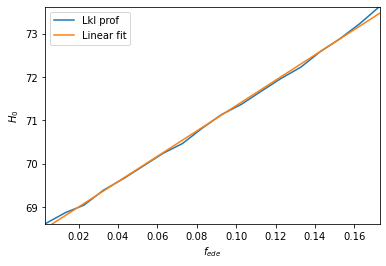

In [17]:
x = lkl_prof_output['f_ede']
y = lkl_prof_output['H0']

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit")


plt.ylabel(r'$H_0$')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

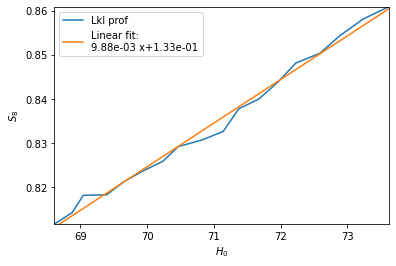

In [21]:
x = lkl_prof_output['H0']
y = lkl_prof_output['sigma8']*(lkl_prof_output['Omega_m']/0.3)**0.5

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit:\n{m:.2e} x+{c:.2e}".format(m=quad[0], c=quad[1]))


plt.ylabel(r'$S_8$')
plt.xlabel(r'$H_0$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

In [22]:
x

array([68.61032, 68.87522, 69.0444 , 69.39357, 69.65451, 69.94496,
       70.23705, 70.46633, 70.81969, 71.13964, 71.37375, 71.67461,
       71.96709, 71.96709, 72.22918, 72.59047, 72.8888 , 73.2356 ,
       73.62799])

In [23]:
y

array([0.81165957, 0.81421446, 0.81815927, 0.81827845, 0.82127637,
       0.82373208, 0.82588298, 0.82920476, 0.83068467, 0.8326181 ,
       0.83777516, 0.83997929, 0.8439187 , 0.8439187 , 0.84812382,
       0.85035301, 0.85433484, 0.858088  , 0.86093416])

In [24]:
lkl_prof_output['f_ede']

array([0.00286787, 0.0134806 , 0.0227443 , 0.03274699, 0.04275435,
       0.05275619, 0.06275354, 0.07275275, 0.0827512 , 0.09275577,
       0.1027555 , 0.1127513 , 0.1227428 , 0.1227428 , 0.1328246 ,
       0.1428195 , 0.1528179 , 0.162816  , 0.1728153 ])

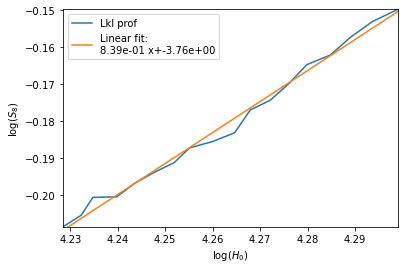

In [19]:
x = np.log(lkl_prof_output['H0'])
y = np.log(lkl_prof_output['sigma8']*(lkl_prof_output['Omega_m']/0.3)**0.5)

plt.plot(x, y, label='Lkl prof')

quad = np.polyfit(x, y, deg=1)
plt.plot(x, quad[0]*x + quad[1], label="Linear fit:\n{m:.2e} x+{c:.2e}".format(m=quad[0], c=quad[1]))


plt.ylabel(r'$\log(S_8)$')
plt.xlabel(r'$\log(H_0)$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y), max(y)])
plt.legend()
plt.show()

In [20]:
lkl_prof_output;

##